In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib
%pip install seaborn
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import xml.etree.ElementTree as ET
import pandas as pd

tree = ET.parse('./mentah/quran-simple.xml')
root = tree.getroot()

data = []

for surah in root.findall('sura'):
    surah_name = surah.get('name')
    surah_index = surah.get('index')
    for aya in surah.findall('aya'):
        data.append({
            'Surah': surah_name,
            'Surah_Index': int(surah_index),
            'Ayat': int(aya.get('index')),
            'Teks_Arab': aya.get('text')
        })

df = pd.DataFrame(data)
df

,Surah,Surah_Index,Ayat,Teks_Arab
0,الفاتحة,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ
1,الفاتحة,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,الفاتحة,1,3,الرَّحْمَـٰنِ الرَّحِيمِ
3,الفاتحة,1,4,مَالِكِ يَوْمِ الدِّينِ
4,الفاتحة,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
...,...,...,...,...
6231,الناس,114,2,مَلِكِ النَّاسِ
6232,الناس,114,3,إِلَـٰهِ النَّاسِ
6233,الناس,114,4,مِن شَرِّ الْوَسْوَاسِ الْخَنَّاسِ
6234,الناس,114,5,الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ


In [4]:
df.to_csv('mentah/quran_cleaned.csv', index=False)


In [5]:
import csv

# Ganti dengan nama file CSV kamu
input_filename = "mentah/tafsir_mukhtasar_indonesia.csv"
output_filename = "mentah/id.mukhtasar.txt"

with open(input_filename, newline='', encoding='utf-8') as csvfile, \
     open(output_filename, 'w', encoding='utf-8') as outfile:

    reader = csv.DictReader(csvfile)
    for row in reader:
        surah = row["surah"].strip()
        ayah = row["ayah"].strip()
        tafsir = row["tafsir"].strip()

        # Lewati jika tafsir hanya angka
        # if tafsir.isdigit():
        #     continue

        # Bersihkan dan format
        cleaned_tafsir = tafsir.replace('\n', ' ').strip()
        outfile.write(f"{surah}|{ayah}|({cleaned_tafsir})\n")

print(f"Output berhasil disimpan ke {output_filename}")

Output berhasil disimpan ke mentah/id.mukhtasar.txt


In [6]:
import pandas as pd

# Buka dan baca file
with open("mentah/id.indonesian.txt", encoding="utf-8") as f:
    verses = f.readlines()

with open("mentah/id.jalalayn.txt", encoding="utf-8") as f:
    Tafsir_Jalalain = f.readlines()

with open("mentah/id.mukhtasar.txt", encoding="utf-8") as f:
    Tafsir_Mukhtasar = f.readlines()

# Parsing helper
def parse_data(lines, col_name):
    data = []
    for line in lines:
        parts = line.strip().split("|", maxsplit=2)
        if len(parts) == 3:
            surah, ayat, text = parts
            data.append({
                "Surah": int(surah),
                "Ayat": int(ayat),
                col_name: text
            })
    return pd.DataFrame(data)

# Ubah ke DataFrame
df_terjemah = parse_data(verses, "Terjemahan")
df_tafsir_jalalain = parse_data(Tafsir_Jalalain, "Tafsir_Jalalain")
df_tafsir_mukhtasar = parse_data(Tafsir_Mukhtasar, "Tafsir_Mukhtasar")

# Gabungkan
df_final = pd.merge(df_terjemah, df_tafsir_jalalain, on=["Surah", "Ayat"], how="inner")
df_final = pd.merge(df_final, df_tafsir_mukhtasar, on=["Surah", "Ayat"], how="inner")
df_final.insert(0, "No", range(1, len(df_final) + 1))
df_final

,No,Surah,Ayat,Terjemahan,Tafsir_Jalalain,Tafsir_Mukhtasar
0,1,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,(Dengan nama Allah Yang Maha Pemurah lagi Maha...,(1)
1,2,1,2,"Segala puji bagi Allah, Tuhan semesta alam.",(Segala puji bagi Allah) Lafal ayat ini merupa...,(Dengan menyebut nama Allah aku mulai membaca ...
2,3,1,3,Maha Pemurah lagi Maha Penyayang.,(Yang Maha Pemurah lagi Maha Penyayang) yaitu ...,(2)
3,4,1,4,Yang menguasai di Hari Pembalasan.,(Yang menguasai hari pembalasan) di hari kiama...,(Segala bentuk pujian berupa keagungan dan kes...
4,5,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",(Hanya Engkaulah yang kami sembah dan hanya ke...,(3)
...,...,...,...,...,...,...
6231,6232,114,2,Raja manusia.,(Raja manusia.),(Dan bertakwalah kepada Zat yang telah mencipt...
6232,6233,114,3,Sembahan manusia.,(Sesembahan manusia) kedua ayat tersebut berke...,(3117)
6233,6234,114,4,Dari kejahatan (bisikan) syaitan yang biasa be...,(Dari kejahatan bisikan) setan; setan dinamaka...,"(Kaum Syu'aib berkata kepada Syu'aib, ""Sesungg..."
6234,6235,114,5,yang membisikkan (kejahatan) ke dalam dada man...,(Yang membisikkan kejahatan ke dalam dada manu...,(3118)


In [7]:
# Salin df dan rename agar tidak bentrok
df_arab_renamed = df.rename(columns={
    "Surah_Index": "Surah",  # biar bisa merge dengan df_final
    "Surah": "Nama_Surah_Arab",
    "Teks_Arab": "Teks_Arab"
})

# Gabungkan berdasarkan Surah (index) dan Ayat
df_quran_full = pd.merge(df_arab_renamed, df_final, on=["Surah", "Ayat"], how="inner")

# Urutkan berdasarkan Surah dan Ayat
df_quran_full = df_quran_full.sort_values(by=["Surah", "Ayat"]).reset_index(drop=True)

# Tampilkan contoh hasil
df_quran_full.head()


,Nama_Surah_Arab,Surah,Ayat,Teks_Arab,No,Terjemahan,Tafsir_Jalalain,Tafsir_Mukhtasar
0,الفاتحة,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,(Dengan nama Allah Yang Maha Pemurah lagi Maha...,(1)
1,الفاتحة,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,"Segala puji bagi Allah, Tuhan semesta alam.",(Segala puji bagi Allah) Lafal ayat ini merupa...,(Dengan menyebut nama Allah aku mulai membaca ...
2,الفاتحة,1,3,الرَّحْمَـٰنِ الرَّحِيمِ,3,Maha Pemurah lagi Maha Penyayang.,(Yang Maha Pemurah lagi Maha Penyayang) yaitu ...,(2)
3,الفاتحة,1,4,مَالِكِ يَوْمِ الدِّينِ,4,Yang menguasai di Hari Pembalasan.,(Yang menguasai hari pembalasan) di hari kiama...,(Segala bentuk pujian berupa keagungan dan kes...
4,الفاتحة,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",(Hanya Engkaulah yang kami sembah dan hanya ke...,(3)


In [8]:
# Simpan ke file CSV
df_quran_full.to_csv('mentah/quran_full_new.csv', index=False)


**1. Explanatory Data Analysis**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [10]:
# Memuat dataset
data = pd.read_csv('mentah/quran_full_new.csv')
data

,Nama_Surah_Arab,Surah,Ayat,Teks_Arab,No,Terjemahan,Tafsir_Jalalain,Tafsir_Mukhtasar
0,الفاتحة,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,(Dengan nama Allah Yang Maha Pemurah lagi Maha...,(1)
1,الفاتحة,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,"Segala puji bagi Allah, Tuhan semesta alam.",(Segala puji bagi Allah) Lafal ayat ini merupa...,(Dengan menyebut nama Allah aku mulai membaca ...
2,الفاتحة,1,3,الرَّحْمَـٰنِ الرَّحِيمِ,3,Maha Pemurah lagi Maha Penyayang.,(Yang Maha Pemurah lagi Maha Penyayang) yaitu ...,(2)
3,الفاتحة,1,4,مَالِكِ يَوْمِ الدِّينِ,4,Yang menguasai di Hari Pembalasan.,(Yang menguasai hari pembalasan) di hari kiama...,(Segala bentuk pujian berupa keagungan dan kes...
4,الفاتحة,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",(Hanya Engkaulah yang kami sembah dan hanya ke...,(3)
...,...,...,...,...,...,...,...,...
6231,الناس,114,2,مَلِكِ النَّاسِ,6232,Raja manusia.,(Raja manusia.),(Dan bertakwalah kepada Zat yang telah mencipt...
6232,الناس,114,3,إِلَـٰهِ النَّاسِ,6233,Sembahan manusia.,(Sesembahan manusia) kedua ayat tersebut berke...,(3117)
6233,الناس,114,4,مِن شَرِّ الْوَسْوَاسِ الْخَنَّاسِ,6234,Dari kejahatan (bisikan) syaitan yang biasa be...,(Dari kejahatan bisikan) setan; setan dinamaka...,"(Kaum Syu'aib berkata kepada Syu'aib, ""Sesungg..."
6234,الناس,114,5,الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ,6235,yang membisikkan (kejahatan) ke dalam dada man...,(Yang membisikkan kejahatan ke dalam dada manu...,(3118)


In [11]:
# Menampilkan informasi dasar tentang dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nama_Surah_Arab   6236 non-null   object
 1   Surah             6236 non-null   int64 
 2   Ayat              6236 non-null   int64 
 3   Teks_Arab         6236 non-null   object
 4   No                6236 non-null   int64 
 5   Terjemahan        6236 non-null   object
 6   Tafsir_Jalalain   6236 non-null   object
 7   Tafsir_Mukhtasar  6236 non-null   object
dtypes: int64(3), object(5)
memory usage: 389.9+ KB
None


In [12]:
# Menampilkan statistik deskriptif untuk kolom numerik
print(data.describe())


             Surah         Ayat           No
count  6236.000000  6236.000000  6236.000000
mean     33.519724    53.506575  3118.500000
std      26.461261    50.463924  1800.322471
min       1.000000     1.000000     1.000000
25%      11.000000    16.000000  1559.750000
50%      26.000000    38.000000  3118.500000
75%      51.000000    75.000000  4677.250000
max     114.000000   286.000000  6236.000000


In [13]:
# Menampilkan beberapa baris pertama dataset
print(data.head())

  Nama_Surah_Arab  Surah  Ayat                                 Teks_Arab  No  \
0         الفاتحة      1     1   بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ   1   
1         الفاتحة      1     2     الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ   2   
2         الفاتحة      1     3                  الرَّحْمَـٰنِ الرَّحِيمِ   3   
3         الفاتحة      1     4                   مَالِكِ يَوْمِ الدِّينِ   4   
4         الفاتحة      1     5  إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ   5   

                                          Terjemahan  \
0  Dengan menyebut nama Allah Yang Maha Pemurah l...   
1        Segala puji bagi Allah, Tuhan semesta alam.   
2                  Maha Pemurah lagi Maha Penyayang.   
3                 Yang menguasai di Hari Pembalasan.   
4  Hanya Engkaulah yang kami sembah, dan hanya ke...   

                                     Tafsir_Jalalain  \
0  (Dengan nama Allah Yang Maha Pemurah lagi Maha...   
1  (Segala puji bagi Allah) Lafal ayat ini merupa...   
2  (Yang Maha 

In [14]:
# Cek missing values
print(data.isnull().sum())

Nama_Surah_Arab     0
Surah               0
Ayat                0
Teks_Arab           0
No                  0
Terjemahan          0
Tafsir_Jalalain     0
Tafsir_Mukhtasar    0
dtype: int64


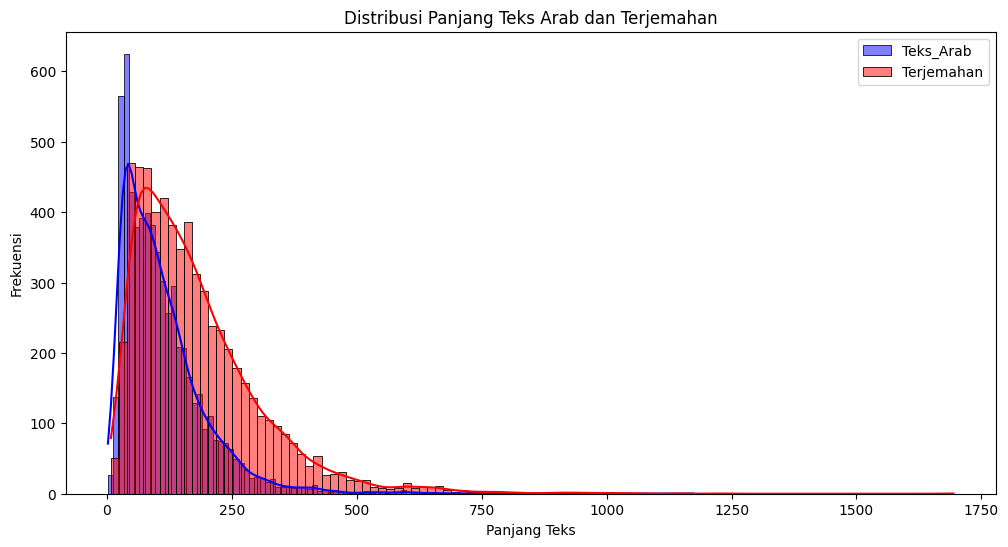

In [15]:
# Visualisasi distribusi panjang teks dalam kolom 'Teks_Arab' dan 'Terjemahan'
data['Teks_Arab_Length'] = data['Teks_Arab'].apply(lambda x: len(str(x)))
data['Terjemahan_Length'] = data['Terjemahan'].apply(lambda x: len(str(x)))
data['Tafsir_Jalalain_Length'] = data['Tafsir_Jalalain'].apply(lambda x: len(str(x)))
data['Tafsir_Mukhtasar_Length'] = data['Tafsir_Mukhtasar'].apply(lambda x: len(str(x)))

plt.figure(figsize=(12, 6))
sns.histplot(data['Teks_Arab_Length'], kde=True, color='blue', label='Teks_Arab')
sns.histplot(data['Terjemahan_Length'], kde=True, color='red', label='Terjemahan')
# sns.histplot(data['Tafsir_Jalalain_Length'], kde=True, color='pink', label='Tafsir_Jalalain')
# sns.histplot(data['Tafsir_Mukhtasar_Length'], kde=True, color='green', label='Tafsir_Mukhtasar')
plt.legend()
plt.title('Distribusi Panjang Teks Arab dan Terjemahan')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.show()


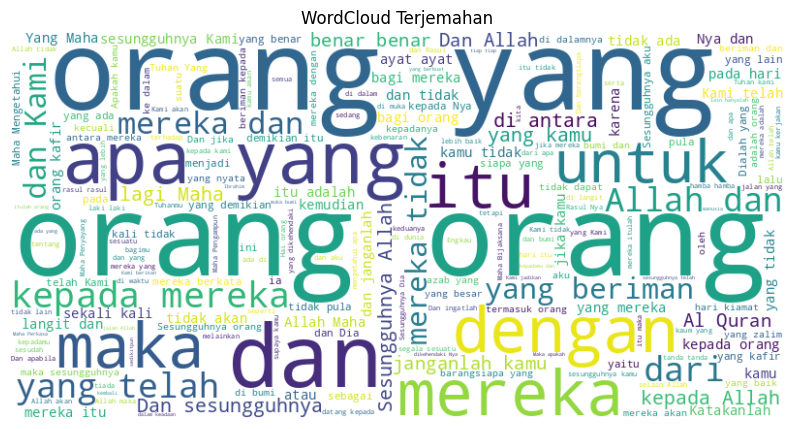

In [16]:
# Visualisasi kata-kata yang paling sering muncul dalam Terjemahan menggunakan WordCloud
text = ' '.join(data['Terjemahan'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Terjemahan')
plt.show()

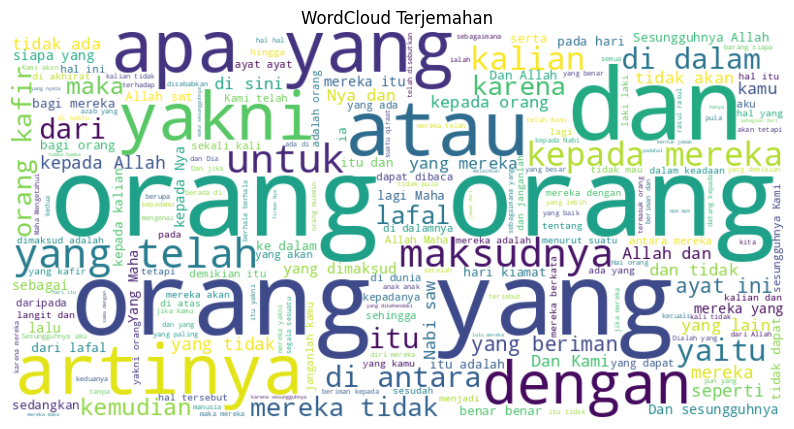

In [17]:
# Visualisasi kata-kata yang paling sering muncul dalam Terjemahan menggunakan WordCloud
text = ' '.join(data['Tafsir_Jalalain'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Terjemahan')
plt.show()

**2. Pembersihan dan Tokenisasi Teks**

In [ ]:
%pip install sastrawi

# Import Library yang diperlukan

In [19]:
import pandas as pd #untuk memanipulasi data dan membaca data
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


In [20]:
#2. Buat Stemmer Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [21]:
#Fungsi Pembersihan + Tokenisasi + Stemming
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # Stemming
    text = stemmer.stem(text)

    return text


In [22]:
%pip install tqdm
%pip install joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
from joblib import Parallel, delayed
from tqdm import tqdm

# Aktifkan progress bar
tqdm.pandas()


In [24]:
#Terapkan ke Kolom Terjemahan dan Tafsir

df_quran_full['Terjemahan_Bersih'] = df_quran_full['Terjemahan'].apply(preprocess_text)

In [25]:
import os
print("Jumlah logical CPU cores:", os.cpu_count())


Jumlah logical CPU cores: 8


In [26]:
df_quran_full['Tafsir_Jalalain_Bersih'] = df_quran_full['Tafsir_Jalalain'].apply(preprocess_text)

In [27]:
df_quran_full['Tafsir_Mukhtasar_Bersih'] = df_quran_full['Tafsir_Mukhtasar'].apply(preprocess_text)

In [28]:
df_quran_full.to_csv("mentah/quran_full.csv", index=False, encoding='utf-8')

In [29]:
#Fitur Pencarian Kata Kunci
def cari_kata_kunci(keyword):
    keyword_bersih = preprocess_text(keyword)

    hasil = df_quran_full[
        df_quran_full['Terjemahan_Bersih'].str.contains(keyword_bersih) |
        df_quran_full['Tafsir_Jalalain_Bersih'].str.contains(keyword_bersih) |
        df_quran_full['Tafsir_Mukhtasar_Bersih'].str.contains(keyword_bersih)
    ]

    return hasil[["Surah", "Nama_Surah_Arab", "Ayat", "Teks_Arab", "Terjemahan", "Tafsir_Jalalain", "Tafsir_Mukhtasar"]]


In [30]:
#Contoh Pencarian
cari_kata_kunci("rezeki")  # atau "pertolongan", "ampunan", "doa", dsb


,Surah,Nama_Surah_Arab,Ayat,Teks_Arab,Terjemahan,Tafsir_Jalalain,Tafsir_Mukhtasar
9,2,البقرة,3,الَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُونَ...,"(yaitu) mereka yang beriman kepada yang ghaib,...",(Orang-orang yang beriman) yang membenarkan (k...,(Kami mempersembahkan segala jenis peribadatan...
19,2,البقرة,13,وَإِذَا قِيلَ لَهُمْ آمِنُوا كَمَا آمَنَ النَّ...,"Apabila dikatakan kepada mereka: ""Berimanlah k...","(Apabila dikatakan kepada mereka, ""Berimanlah ...",(3-4. (Orang-orang yang bertakwa itu adalah) o...
21,2,البقرة,15,اللَّهُ يَسْتَهْزِئُ بِهِمْ وَيَمُدُّهُمْ فِي ...,Allah akan (membalas) olok-olokan mereka dan m...,(Allahlah yang memperolok-olokkan mereka) arti...,(3-4. (Orang-orang yang bertakwa itu adalah) o...
28,2,البقرة,22,الَّذِي جَعَلَ لَكُمُ الْأَرْضَ فِرَاشًا وَالس...,Dialah yang menjadikan bumi sebagai hamparan b...,(Dialah yang telah menjadikan) menciptakan (ba...,(15)
31,2,البقرة,25,وَبَشِّرِ الَّذِينَ آمَنُوا وَعَمِلُوا الصَّال...,Dan sampaikanlah berita gembira kepada mereka ...,(Dan sampaikanlah berita gembira) kabarkanlah ...,"(Karena kebodohan mereka, mereka mengira akan ..."
...,...,...,...,...,...,...,...
5645,77,المرسلات,24,وَيْلٌ يَوْمَئِذٍ لِّلْمُكَذِّبِينَ,Kecelakaan yang besarlah pada hari itu bagi or...,(Kecelakaan yang besarlah pada hari itu bagi o...,"(""Dan nikahkanlah -wahai kaum beriman- orang-o..."
5657,77,المرسلات,36,وَلَا يُؤْذَنُ لَهُمْ فَيَعْتَذِرُونَ,dan tidak diizinkan kepada mereka minta uzur s...,(Dan tidak diizinkan kepada mereka) mengemukak...,(Mereka mengerjakan yang demikian itu supaya A...
5723,79,النازعات,12,قَالُوا تِلْكَ إِذًا كَرَّةٌ خَاسِرَةٌ,"Mereka berkata: ""Kalau demikian, itu adalah su...","(Mereka berkata, ""Hal itu) maksudnya, dihidupk...",(Dan orang-orang musyrik yang mendustakan Nabi...
5725,79,النازعات,14,فَإِذَا هُم بِالسَّاهِرَةِ,maka dengan serta merta mereka hidup kembali d...,(Maka dengan serta-merta mereka) yakni semua m...,(Atau mengapa tidak diturunkan kepadanya perbe...


In [31]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
#Pencarian Semantik dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [33]:
#Gabungkan Kolom Terjemahan + Tafsir
df_quran_full["Isi_Bersih"] = df_quran_full["Terjemahan_Bersih"] + " " + df_quran_full["Tafsir_Jalalain_Bersih"] + " " + df_quran_full["Tafsir_Mukhtasar_Bersih"]


In [34]:
#TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_quran_full["Isi_Bersih"])


In [35]:
#Fungsi Pencarian Semantik
def cari_semantik(query, top_n=5):
    # Preprocess query
    query_bersih = preprocess_text(query)

    # Transform query ke dalam bentuk vektor TF-IDF
    query_vec = vectorizer.transform([query_bersih])

    # Hitung cosine similarity
    similarity = cosine_similarity(query_vec, tfidf_matrix).flatten()

    # Ambil top-N hasil dengan skor tertinggi
    indeks_teratas = similarity.argsort()[::-1][:top_n]

    hasil = df_quran_full.iloc[indeks_teratas][["Surah", "Nama_Surah_Arab", "Ayat", "Teks_Arab", "Terjemahan", "Tafsir_Jalalain", "Tafsir_Mukhtasar"]].copy()
    hasil["Skor_Kemiripan"] = similarity[indeks_teratas]

    return hasil


In [36]:
#Contoh Penggunaan
cari_semantik("sapi", top_n=5)


,Surah,Nama_Surah_Arab,Ayat,Teks_Arab,Terjemahan,Tafsir_Jalalain,Tafsir_Mukhtasar,Skor_Kemiripan
74,2,البقرة,68,قَالُوا ادْعُ لَنَا رَبَّكَ يُبَيِّن لَّنَا مَ...,"Mereka menjawab: ""Mohonkanlah kepada Tuhanmu u...","(Mereka bertanya, ""Mohonkanlah kepada Tuhanmu ...",(38),0.535495
77,2,البقرة,71,قَالَ إِنَّهُ يَقُولُ إِنَّهَا بَقَرَةٌ لَّا ذ...,"Musa berkata: ""Sesungguhnya Allah berfirman ba...","(Kata Musa, ""Allah berfirman bahwa sapi betina...",(Para Malaikat mengakui kekurangan mereka dan ...,0.481890
76,2,البقرة,70,قَالُوا ادْعُ لَنَا رَبَّكَ يُبَيِّن لَّنَا مَ...,"Mereka berkata: ""Mohonkanlah kepada Tuhanmu un...","(Kata mereka, ""Mohonkanlah kepada Tuhanmu untu...",(39),0.475217
153,2,البقرة,147,الْحَقُّ مِن رَّبِّكَ ۖ فَلَا تَكُونَنَّ مِنَ ...,"Kebenaran itu adalah dari Tuhanmu, sebab itu j...","(Kebenaran itu) betapa pun (dari Tuhanmu, maka...",(Kemudian mereka meneruskan keangkuhan mereka ...,0.447632
98,2,البقرة,92,۞ وَلَقَدْ جَاءَكُم مُّوسَىٰ بِالْبَيِّنَاتِ ث...,Sesungguhnya Musa telah datang kepadamu membaw...,(Dan sesungguhnya telah datang kepada kamu sek...,(50),0.395871


In [37]:
#Simpan Menggunakan joblib atau pickle
import joblib

# Simpan model TF-IDF dan matriks
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(tfidf_matrix, "tfidf_matrix.pkl")

# Simpan dataframe
df_quran_full.to_pickle("df_quran_full.pkl")



In [38]:
#mengganti nama surah ke Bahasa Indonesia
surah_indonesia = [
    "Al-Fatihah", "Al-Baqarah", "Ali 'Imran", "An-Nisa'", "Al-Ma'idah", "Al-An'am", "Al-A'raf",
    "Al-Anfal", "At-Taubah", "Yunus", "Hud", "Yusuf", "Ar-Ra'd", "Ibrahim", "Al-Hijr", "An-Nahl",
    "Al-Isra'", "Al-Kahfi", "Maryam", "Ta Ha", "Al-Anbiya'", "Al-Hajj", "Al-Mu'minun", "An-Nur",
    "Al-Furqan", "Ash-Shu'ara", "An-Naml", "Al-Qasas", "Al-Ankabut", "Ar-Rum", "Luqman", "As-Sajdah",
    "Al-Ahzab", "Saba'", "Fatir", "Ya Sin", "As-Saffat", "Sad", "Az-Zumar", "Ghafir", "Fussilat",
    "Asy-Syura", "Az-Zukhruf", "Ad-Dukhan", "Al-Jasiyah", "Al-Ahqaf", "Muhammad", "Al-Fath", "Al-Hujurat",
    "Qaf", "Adz-Dzariyat", "At-Tur", "An-Najm", "Al-Qamar", "Ar-Rahman", "Al-Waqi'ah", "Al-Hadid",
    "Al-Mujadilah", "Al-Hasyr", "Al-Mumtahanah", "As-Saff", "Al-Jumu'ah", "Al-Munafiqun", "At-Taghabun",
    "At-Talaq", "At-Tahrim", "Al-Mulk", "Al-Qalam", "Al-Haqqah", "Al-Ma'arij", "Nuh", "Al-Jinn",
    "Al-Muzzammil", "Al-Muddathir", "Al-Qiyamah", "Al-Insan", "Al-Mursalat", "An-Naba'", "An-Nazi'at",
    "Abasa", "At-Takwir", "Al-Infitar", "Al-Mutaffifin", "Al-Insyiqaq", "Al-Buruj", "At-Tariq", "Al-A'la",
    "Al-Ghasyiyah", "Al-Fajr", "Al-Balad", "Asy-Syams", "Al-Lail", "Adh-Dhuha", "Al-Insyirah",
    "At-Tin", "Al-'Alaq", "Al-Qadr", "Al-Bayyinah", "Az-Zalzalah", "Al-‘Adiyat", "Al-Qari’ah",
    "At-Takatsur", "Al-‘Asr", "Al-Humazah", "Al-Fil", "Quraisy", "Al-Ma’un", "Al-Kautsar",
    "Al-Kafirun", "An-Nashr", "Al-Lahab", "Al-Ikhlas", "Al-Falaq", "An-Nas"
]

df_quran_full["Nama_Surah_Indo"] = df_quran_full["Surah"].apply(lambda x: surah_indonesia[int(x)-1])
df_quran_full

,Nama_Surah_Arab,Surah,Ayat,Teks_Arab,No,Terjemahan,Tafsir_Jalalain,Tafsir_Mukhtasar,Terjemahan_Bersih,Tafsir_Jalalain_Bersih,Tafsir_Mukhtasar_Bersih,Isi_Bersih,Nama_Surah_Indo
0,الفاتحة,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,(Dengan nama Allah Yang Maha Pemurah lagi Maha...,(1),dengan sebut nama allah yang maha murah lagi m...,dengan nama allah yang maha murah lagi maha sa...,,dengan sebut nama allah yang maha murah lagi m...,Al-Fatihah
1,الفاتحة,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,"Segala puji bagi Allah, Tuhan semesta alam.",(Segala puji bagi Allah) Lafal ayat ini merupa...,(Dengan menyebut nama Allah aku mulai membaca ...,segala puji bagi allah tuhan semesta alam,segala puji bagi allah lafal ayat ini rupa kal...,dengan sebut nama allah aku mulai baca alquran...,segala puji bagi allah tuhan semesta alam sega...,Al-Fatihah
2,الفاتحة,1,3,الرَّحْمَـٰنِ الرَّحِيمِ,3,Maha Pemurah lagi Maha Penyayang.,(Yang Maha Pemurah lagi Maha Penyayang) yaitu ...,(2),maha murah lagi maha sayang,yang maha murah lagi maha sayang yaitu yang pu...,,maha murah lagi maha sayang yang maha murah la...,Al-Fatihah
3,الفاتحة,1,4,مَالِكِ يَوْمِ الدِّينِ,4,Yang menguasai di Hari Pembalasan.,(Yang menguasai hari pembalasan) di hari kiama...,(Segala bentuk pujian berupa keagungan dan kes...,yang kuasa di hari balas,yang kuasa hari balas di hari kiamat kelak laf...,segala bentuk puji upa agung dan sempurna hany...,yang kuasa di hari balas yang kuasa hari balas...,Al-Fatihah
4,الفاتحة,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",(Hanya Engkaulah yang kami sembah dan hanya ke...,(3),hanya engkau yang kami sembah dan hanya kepada...,hanya engkau yang kami sembah dan hanya kepada...,,hanya engkau yang kami sembah dan hanya kepada...,Al-Fatihah
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,الناس,114,2,مَلِكِ النَّاسِ,6232,Raja manusia.,(Raja manusia.),(Dan bertakwalah kepada Zat yang telah mencipt...,raja manusia,raja manusia,dan takwa kepada zat yang telah cipta kalian d...,raja manusia raja manusia dan takwa kepada zat...,An-Nas
6232,الناس,114,3,إِلَـٰهِ النَّاسِ,6233,Sembahan manusia.,(Sesembahan manusia) kedua ayat tersebut berke...,(3117),sembah manusia,sembah manusia dua ayat sebut keduduk bagai ba...,,sembah manusia sembah manusia dua ayat sebut k...,An-Nas
6233,الناس,114,4,مِن شَرِّ الْوَسْوَاسِ الْخَنَّاسِ,6234,Dari kejahatan (bisikan) syaitan yang biasa be...,(Dari kejahatan bisikan) setan; setan dinamaka...,"(Kaum Syu'aib berkata kepada Syu'aib, ""Sesungg...",dari jahat bisik syaitan yang biasa sembunyi,dari jahat bisik setan setan nama bisik karena...,kaum syuaib kata kepada syuaib sungguh engkau ...,dari jahat bisik syaitan yang biasa sembunyi d...,An-Nas
6234,الناس,114,5,الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ,6235,yang membisikkan (kejahatan) ke dalam dada man...,(Yang membisikkan kejahatan ke dalam dada manu...,(3118),yang bisik jahat ke dalam dada manusia,yang bisik jahat ke dalam dada manusia ke dala...,,yang bisik jahat ke dalam dada manusia yang bi...,An-Nas


In [39]:
#Menata ulang urutan kolom
# Dapatkan daftar semua kolom
cols = df_quran_full.columns.tolist()

# Hapus kolom Nama_Surah_Indo dari posisi awalnya
cols.remove('Nama_Surah_Indo')

# Masukkan kembali di sebelah kanan kolom Nama_Surah_Arab
index_nama_surah_arab = cols.index('Nama_Surah_Arab')
cols.insert(index_nama_surah_arab + 1, 'Nama_Surah_Indo')

# Terapkan urutan kolom baru
df_quran_full = df_quran_full[cols]

df_quran_full

,Nama_Surah_Arab,Nama_Surah_Indo,Surah,Ayat,Teks_Arab,No,Terjemahan,Tafsir_Jalalain,Tafsir_Mukhtasar,Terjemahan_Bersih,Tafsir_Jalalain_Bersih,Tafsir_Mukhtasar_Bersih,Isi_Bersih
0,الفاتحة,Al-Fatihah,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,(Dengan nama Allah Yang Maha Pemurah lagi Maha...,(1),dengan sebut nama allah yang maha murah lagi m...,dengan nama allah yang maha murah lagi maha sa...,,dengan sebut nama allah yang maha murah lagi m...
1,الفاتحة,Al-Fatihah,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,"Segala puji bagi Allah, Tuhan semesta alam.",(Segala puji bagi Allah) Lafal ayat ini merupa...,(Dengan menyebut nama Allah aku mulai membaca ...,segala puji bagi allah tuhan semesta alam,segala puji bagi allah lafal ayat ini rupa kal...,dengan sebut nama allah aku mulai baca alquran...,segala puji bagi allah tuhan semesta alam sega...
2,الفاتحة,Al-Fatihah,1,3,الرَّحْمَـٰنِ الرَّحِيمِ,3,Maha Pemurah lagi Maha Penyayang.,(Yang Maha Pemurah lagi Maha Penyayang) yaitu ...,(2),maha murah lagi maha sayang,yang maha murah lagi maha sayang yaitu yang pu...,,maha murah lagi maha sayang yang maha murah la...
3,الفاتحة,Al-Fatihah,1,4,مَالِكِ يَوْمِ الدِّينِ,4,Yang menguasai di Hari Pembalasan.,(Yang menguasai hari pembalasan) di hari kiama...,(Segala bentuk pujian berupa keagungan dan kes...,yang kuasa di hari balas,yang kuasa hari balas di hari kiamat kelak laf...,segala bentuk puji upa agung dan sempurna hany...,yang kuasa di hari balas yang kuasa hari balas...
4,الفاتحة,Al-Fatihah,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",(Hanya Engkaulah yang kami sembah dan hanya ke...,(3),hanya engkau yang kami sembah dan hanya kepada...,hanya engkau yang kami sembah dan hanya kepada...,,hanya engkau yang kami sembah dan hanya kepada...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,الناس,An-Nas,114,2,مَلِكِ النَّاسِ,6232,Raja manusia.,(Raja manusia.),(Dan bertakwalah kepada Zat yang telah mencipt...,raja manusia,raja manusia,dan takwa kepada zat yang telah cipta kalian d...,raja manusia raja manusia dan takwa kepada zat...
6232,الناس,An-Nas,114,3,إِلَـٰهِ النَّاسِ,6233,Sembahan manusia.,(Sesembahan manusia) kedua ayat tersebut berke...,(3117),sembah manusia,sembah manusia dua ayat sebut keduduk bagai ba...,,sembah manusia sembah manusia dua ayat sebut k...
6233,الناس,An-Nas,114,4,مِن شَرِّ الْوَسْوَاسِ الْخَنَّاسِ,6234,Dari kejahatan (bisikan) syaitan yang biasa be...,(Dari kejahatan bisikan) setan; setan dinamaka...,"(Kaum Syu'aib berkata kepada Syu'aib, ""Sesungg...",dari jahat bisik syaitan yang biasa sembunyi,dari jahat bisik setan setan nama bisik karena...,kaum syuaib kata kepada syuaib sungguh engkau ...,dari jahat bisik syaitan yang biasa sembunyi d...
6234,الناس,An-Nas,114,5,الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ,6235,yang membisikkan (kejahatan) ke dalam dada man...,(Yang membisikkan kejahatan ke dalam dada manu...,(3118),yang bisik jahat ke dalam dada manusia,yang bisik jahat ke dalam dada manusia ke dala...,,yang bisik jahat ke dalam dada manusia yang bi...


In [40]:
#Menata ulang urutan kolom
# Dapatkan daftar semua kolom
cols = df_quran_full.columns.tolist()

# Hapus kolom Nama_Surah_Indo dari posisi awalnya
cols.remove('Nama_Surah_Indo')

# Masukkan kembali di sebelah kanan kolom Nama_Surah_Arab
index_nama_surah_arab = cols.index('Nama_Surah_Arab')
cols.insert(index_nama_surah_arab + 1, 'Nama_Surah_Indo')

# Terapkan urutan kolom baru
df_quran_full = df_quran_full[cols]

# Simpan ke CSV
df_quran_full.to_csv('mentah/df_quran_full.csv', index=False)


In [41]:

df_quran_full

,Nama_Surah_Arab,Nama_Surah_Indo,Surah,Ayat,Teks_Arab,No,Terjemahan,Tafsir_Jalalain,Tafsir_Mukhtasar,Terjemahan_Bersih,Tafsir_Jalalain_Bersih,Tafsir_Mukhtasar_Bersih,Isi_Bersih
0,الفاتحة,Al-Fatihah,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,(Dengan nama Allah Yang Maha Pemurah lagi Maha...,(1),dengan sebut nama allah yang maha murah lagi m...,dengan nama allah yang maha murah lagi maha sa...,,dengan sebut nama allah yang maha murah lagi m...
1,الفاتحة,Al-Fatihah,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,"Segala puji bagi Allah, Tuhan semesta alam.",(Segala puji bagi Allah) Lafal ayat ini merupa...,(Dengan menyebut nama Allah aku mulai membaca ...,segala puji bagi allah tuhan semesta alam,segala puji bagi allah lafal ayat ini rupa kal...,dengan sebut nama allah aku mulai baca alquran...,segala puji bagi allah tuhan semesta alam sega...
2,الفاتحة,Al-Fatihah,1,3,الرَّحْمَـٰنِ الرَّحِيمِ,3,Maha Pemurah lagi Maha Penyayang.,(Yang Maha Pemurah lagi Maha Penyayang) yaitu ...,(2),maha murah lagi maha sayang,yang maha murah lagi maha sayang yaitu yang pu...,,maha murah lagi maha sayang yang maha murah la...
3,الفاتحة,Al-Fatihah,1,4,مَالِكِ يَوْمِ الدِّينِ,4,Yang menguasai di Hari Pembalasan.,(Yang menguasai hari pembalasan) di hari kiama...,(Segala bentuk pujian berupa keagungan dan kes...,yang kuasa di hari balas,yang kuasa hari balas di hari kiamat kelak laf...,segala bentuk puji upa agung dan sempurna hany...,yang kuasa di hari balas yang kuasa hari balas...
4,الفاتحة,Al-Fatihah,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",(Hanya Engkaulah yang kami sembah dan hanya ke...,(3),hanya engkau yang kami sembah dan hanya kepada...,hanya engkau yang kami sembah dan hanya kepada...,,hanya engkau yang kami sembah dan hanya kepada...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,الناس,An-Nas,114,2,مَلِكِ النَّاسِ,6232,Raja manusia.,(Raja manusia.),(Dan bertakwalah kepada Zat yang telah mencipt...,raja manusia,raja manusia,dan takwa kepada zat yang telah cipta kalian d...,raja manusia raja manusia dan takwa kepada zat...
6232,الناس,An-Nas,114,3,إِلَـٰهِ النَّاسِ,6233,Sembahan manusia.,(Sesembahan manusia) kedua ayat tersebut berke...,(3117),sembah manusia,sembah manusia dua ayat sebut keduduk bagai ba...,,sembah manusia sembah manusia dua ayat sebut k...
6233,الناس,An-Nas,114,4,مِن شَرِّ الْوَسْوَاسِ الْخَنَّاسِ,6234,Dari kejahatan (bisikan) syaitan yang biasa be...,(Dari kejahatan bisikan) setan; setan dinamaka...,"(Kaum Syu'aib berkata kepada Syu'aib, ""Sesungg...",dari jahat bisik syaitan yang biasa sembunyi,dari jahat bisik setan setan nama bisik karena...,kaum syuaib kata kepada syuaib sungguh engkau ...,dari jahat bisik syaitan yang biasa sembunyi d...
6234,الناس,An-Nas,114,5,الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ,6235,yang membisikkan (kejahatan) ke dalam dada man...,(Yang membisikkan kejahatan ke dalam dada manu...,(3118),yang bisik jahat ke dalam dada manusia,yang bisik jahat ke dalam dada manusia ke dala...,,yang bisik jahat ke dalam dada manusia yang bi...


In [42]:
#Melakukan NER pada Ayat Al-Qur’an

**Membuat sistem pencarian tafsir berbasis makna dengan Named Entity Recognition (NER) dari kolom Tafsir_Bersih atau Isi_Bersih.**



In [43]:
%pip install pandas spacy==3.7.2 scikit-learn

  Using cached spacy-3.7.2.tar.gz (1.3 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [510 lines of output]
      Ignoring numpy: markers 'python_version < "3.9"' don't match your environment
        Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
        Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
        Using cached cymem-2.0.11-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.5 kB)
        Using cached preshed-3.0.10-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.4 kB)
        Using cached murmurhash-1.0.13-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.2 kB)
        Using cached thinc-8.2.5.tar.gz (193 kB)
        Installing build dependencies: started
        Installing build dependencies: still running...
        Installing build dependencies: finished with status 'error'
        error: subprocess-exited-wit

In [44]:
%pip install python -m spacy download en_core_web_sm



Usage:   
  /Applications/projects/cobain/quranapp-workspace/.venv/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Applications/projects/cobain/quranapp-workspace/.venv/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Applications/projects/cobain/quranapp-workspace/.venv/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Applications/projects/cobain/quranapp-workspace/.venv/bin/python -m pip install [options] [-e] <local project path> ...
  /Applications/projects/cobain/quranapp-workspace/.venv/bin/python -m pip install [options] <archive url/path> ...

no such option: -m
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd

# Baca data
df = pd.read_csv('mentah/df_quran_full.csv')

# Cek kolom dan data
print(df.columns)
print(df[['Tafsir_Jalalain_Bersih', "Tafsir_Mukhtasar_Bersih", 'Isi_Bersih']].head())


Index(['Nama_Surah_Arab', 'Nama_Surah_Indo', 'Surah', 'Ayat', 'Teks_Arab',
       'No', 'Terjemahan', 'Tafsir_Jalalain', 'Tafsir_Mukhtasar',
       'Terjemahan_Bersih', 'Tafsir_Jalalain_Bersih',
       'Tafsir_Mukhtasar_Bersih', 'Isi_Bersih'],
      dtype='object')
                              Tafsir_Jalalain_Bersih  \
0  dengan nama allah yang maha murah lagi maha sa...   
1  segala puji bagi allah lafal ayat ini rupa kal...   
2  yang maha murah lagi maha sayang yaitu yang pu...   
3  yang kuasa hari balas di hari kiamat kelak laf...   
4  hanya engkau yang kami sembah dan hanya kepada...   

                             Tafsir_Mukhtasar_Bersih  \
0                                                NaN   
1  dengan sebut nama allah aku mulai baca alquran...   
2                                                NaN   
3  segala bentuk puji upa agung dan sempurna hany...   
4                                                NaN   

                                          Isi_Bersih  
0  de

In [46]:
import spacy

# Load model bahasa Inggris
nlp = spacy.load("en_core_web_sm")


**Fungsi Ekstrak Named Entities dari Tafsir**

In [47]:
def extract_entities(text):
    doc = nlp(str(text))
    return [(ent.text, ent.label_) for ent in doc.ents]

df['Entities_Jalalain'] = df['Tafsir_Jalalain_Bersih'].apply(extract_entities)
df['Entities_Mukhtasar'] = df['Tafsir_Mukhtasar_Bersih'].apply(extract_entities)


**Contoh Hasil**

In [48]:
print(df[['Terjemahan_Bersih', 'Tafsir_Jalalain_Bersih', 'Tafsir_Mukhtasar_Bersih', 'Entities_Jalalain', 'Entities_Mukhtasar']].head(10))


                                   Terjemahan_Bersih  \
0  dengan sebut nama allah yang maha murah lagi m...   
1          segala puji bagi allah tuhan semesta alam   
2                        maha murah lagi maha sayang   
3                           yang kuasa di hari balas   
4  hanya engkau yang kami sembah dan hanya kepada...   
5                       tunjuk kami jalan yang lurus   
6  yaitu jalan orangorang yang telah engkau beri ...   
7                                     alif laam miim   
8  kitab al quran ini tidak ada ragu pada tunjuk ...   
9  yaitu mereka yang iman kepada yang ghaib yang ...   

                              Tafsir_Jalalain_Bersih  \
0  dengan nama allah yang maha murah lagi maha sa...   
1  segala puji bagi allah lafal ayat ini rupa kal...   
2  yang maha murah lagi maha sayang yaitu yang pu...   
3  yang kuasa hari balas di hari kiamat kelak laf...   
4  hanya engkau yang kami sembah dan hanya kepada...   
5  tunjuk kami ke jalan yang lurus arti bimbing

**Filter Berdasarkan Jenis Entity**

In [49]:
def extract_filtered_entities(text, labels=["PERSON", "GPE", "ORG"]):
    doc = nlp(str(text))
    return [ent.text for ent in doc.ents if ent.label_ in labels]

df['Filtered_Jalalain_Entities'] = df['Tafsir_Jalalain_Bersih'].apply(lambda x: extract_filtered_entities(x))
df['Filtered_Mukhtasar_Entities'] = df['Tafsir_Mukhtasar_Bersih'].apply(lambda x: extract_filtered_entities(x))


**Buat Index untuk Pencarian Makna** **bold text**

Menggunakan hasil Filtered_Entities untuk membuat index pencarian berdasarkan entitas, misalnya:

In [50]:
# Buat inverted index
from collections import defaultdict

inverted_index = defaultdict(list)

for idx, row in df.iterrows():
    for entity in row['Filtered_Jalalain_Entities']:
        inverted_index[entity.lower()].append(idx)
    for entity in row['Filtered_Mukhtasar_Entities']:
        inverted_index[entity.lower()].append(idx)


**Fitur Pencarian Berdasarkan Makna**

In [51]:
def search_by_keyword(keyword):
    keyword = keyword.lower()
    if keyword in inverted_index:
        results = df.loc[inverted_index[keyword], ['Surah', 'Ayat', 'Tafsir_Jalalain', 'Tafsir_Mukhtasar']]
        return results
    else:
        return "Tidak ditemukan."

# Contoh pencarian
print(search_by_keyword('sedih'))  # Atau keyword lain seperti 'Egypt'


      Surah  Ayat                                    Tafsir_Jalalain  \
1691     12    96  (Tatkala) huruf an di sini adalah zaidah (tela...   
4247     41    30  (Sesungguhnya orang-orang yang mengatakan, "Ra...   

                                       Tafsir_Mukhtasar  
1691  (Katakanlah -wahai Rasul- kepada orang-orang m...  
4247  (Katakanlah -wahai Rasul- sebagai bantahan kep...  


**Preprocessing Kata Makna Sendiri**

**Mengganti Nama Kolom Tafsir menjadi Jalalain**

In [52]:
df = df.rename(columns={'Tafsir': 'Tafsir_Jalalain'})
df

,Nama_Surah_Arab,Nama_Surah_Indo,Surah,Ayat,Teks_Arab,No,Terjemahan,Tafsir_Jalalain,Tafsir_Mukhtasar,Terjemahan_Bersih,Tafsir_Jalalain_Bersih,Tafsir_Mukhtasar_Bersih,Isi_Bersih,Entities_Jalalain,Entities_Mukhtasar,Filtered_Jalalain_Entities,Filtered_Mukhtasar_Entities
0,الفاتحة,Al-Fatihah,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,(Dengan nama Allah Yang Maha Pemurah lagi Maha...,(1),dengan sebut nama allah yang maha murah lagi m...,dengan nama allah yang maha murah lagi maha sa...,NaN,dengan sebut nama allah yang maha murah lagi m...,"[(dengan nama, PERSON), (yang maha murah, PERS...","[(nan, PERSON)]","[dengan nama, yang maha murah, maha sayang]",[nan]
1,الفاتحة,Al-Fatihah,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,"Segala puji bagi Allah, Tuhan semesta alam.",(Segala puji bagi Allah) Lafal ayat ini merupa...,(Dengan menyebut nama Allah aku mulai membaca ...,segala puji bagi allah tuhan semesta alam,segala puji bagi allah lafal ayat ini rupa kal...,dengan sebut nama allah aku mulai baca alquran...,segala puji bagi allah tuhan semesta alam sega...,"[(segala, PERSON), (bagi allah, ORG), (ayat in...","[(dengan sebut, ORG), (nama allah, PERSON), (i...","[segala, bagi allah, ayat ini rupa, puji kepad...","[dengan sebut, nama allah, ini, taala dan hara..."
2,الفاتحة,Al-Fatihah,1,3,الرَّحْمَـٰنِ الرَّحِيمِ,3,Maha Pemurah lagi Maha Penyayang.,(Yang Maha Pemurah lagi Maha Penyayang) yaitu ...,(2),maha murah lagi maha sayang,yang maha murah lagi maha sayang yaitu yang pu...,NaN,maha murah lagi maha sayang yang maha murah la...,"[(yang maha murah, PERSON), (yang punya rahmat...","[(nan, PERSON)]","[yang maha murah, yang punya rahmat rahmat]",[nan]
3,الفاتحة,Al-Fatihah,1,4,مَالِكِ يَوْمِ الدِّينِ,4,Yang menguasai di Hari Pembalasan.,(Yang menguasai hari pembalasan) di hari kiama...,(Segala bentuk pujian berupa keagungan dan kes...,yang kuasa di hari balas,yang kuasa hari balas di hari kiamat kelak laf...,segala bentuk puji upa agung dan sempurna hany...,yang kuasa di hari balas yang kuasa hari balas...,"[(yang kuasa hari, PERSON), (kelak lafal, PERS...","[(segala bentuk, PERSON), (upa agung dan sempu...","[yang kuasa hari, kelak lafal, khusus karena d...","[segala bentuk, upa agung dan sempurna, hanya ..."
4,الفاتحة,Al-Fatihah,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",(Hanya Engkaulah yang kami sembah dan hanya ke...,(3),hanya engkau yang kami sembah dan hanya kepada...,hanya engkau yang kami sembah dan hanya kepada...,NaN,hanya engkau yang kami sembah dan hanya kepada...,"[(hanya, GPE), (yang kami, PERSON), (dan hanya...","[(nan, PERSON)]","[hanya, yang kami, dan hanya kepada, kami moho...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,الناس,An-Nas,114,2,مَلِكِ النَّاسِ,6232,Raja manusia.,(Raja manusia.),(Dan bertakwalah kepada Zat yang telah mencipt...,raja manusia,raja manusia,dan takwa kepada zat yang telah cipta kalian d...,raja manusia raja manusia dan takwa kepada zat...,"[(raja manusia, PERSON)]","[(dan takwa kepada, PERSON), (zat yang telah c...",[raja manusia],"[dan takwa kepada, zat yang telah cipta kalian..."
6232,الناس,An-Nas,114,3,إِلَـٰهِ النَّاسِ,6233,Sembahan manusia.,(Sesembahan manusia) kedua ayat tersebut berke...,(3117),sembah manusia,sembah manusia dua ayat sebut keduduk bagai ba...,NaN,sembah manusia sembah manusia dua ayat sebut k...,"[(manusia dua ayat, ORG), (ilaih, ORG), (dua a...","[(nan, PERSON)]","[manusia dua ayat, ilaih, dua ayat ini maksud]",[nan]
6233,الناس,An-Nas,114,4,مِن شَرِّ الْوَسْوَاسِ الْخَنَّاسِ,6234,Dari kejahatan (bisikan) syaitan yang biasa be...,(Dari kejahatan bisikan) setan; setan dinamaka...,"(Kaum Syu'aib berkata kepada Syu'aib, ""Sesungg...",dari jahat bisik syaitan yang biasa sembunyi,dari jahat bisik setan setan nama bisik karena...,kaum syuaib kata kepada syuaib sungguh engkau ...,dari jahat bisik syaitan yang biasa sembunyi d...,"[(dari

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Isi_Bersih'].fillna(""))

def semantic_search(query, top_n=5):
    query_vec = vectorizer.transform([query])
    similarity = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_indices = similarity.argsort()[-top_n:][::-1]
    return df.loc[top_indices, ['Surah', 'Ayat', 'Tafsir_Jalalain_Bersih', 'Tafsir_Mukhtasar', 'Isi_Bersih']]

# Contoh pencarian
semantic_search("kehidupan setelah mati")


,Surah,Ayat,Tafsir_Jalalain_Bersih,Tafsir_Mukhtasar,Isi_Bersih
4448,44,35,tidak ada mati yang sudah ada hidup lagi selai...,(2225),tidak ada mati selain mati di dunia ini dan ka...
4087,39,30,sungguh kamu khithab ini tuju kepada nabi saw ...,(Barangsiapa yang mengikuti hidayah dan petunj...,sungguh kamu akan mati dan sungguh mereka akan...
5198,63,11,dan allah sekalikali tidak akan tangguh mati o...,(2600),dan allah sekalikali tidak akan tangguh mati o...
4469,44,56,mereka tidak akan rasa mati di dalam kecuali m...,"(Zulkarnain berkata, ""Apa yang telah dikarunia...",mereka tidak akan rasa mati di dalam kecuali m...
5541,74,47,hingga datang kepada kami mati ajal kami,(Dan aku berlindung pula kepada-Mu wahai Tuhan...,hingga datang kepada kami mati hingga datang k...


In [54]:
df.to_csv('mentah/df_quran_with_entities.csv', index=False)


In [55]:
df

,Nama_Surah_Arab,Nama_Surah_Indo,Surah,Ayat,Teks_Arab,No,Terjemahan,Tafsir_Jalalain,Tafsir_Mukhtasar,Terjemahan_Bersih,Tafsir_Jalalain_Bersih,Tafsir_Mukhtasar_Bersih,Isi_Bersih,Entities_Jalalain,Entities_Mukhtasar,Filtered_Jalalain_Entities,Filtered_Mukhtasar_Entities
0,الفاتحة,Al-Fatihah,1,1,بِسْمِ اللَّهِ الرَّحْمَـٰنِ الرَّحِيمِ,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,(Dengan nama Allah Yang Maha Pemurah lagi Maha...,(1),dengan sebut nama allah yang maha murah lagi m...,dengan nama allah yang maha murah lagi maha sa...,NaN,dengan sebut nama allah yang maha murah lagi m...,"[(dengan nama, PERSON), (yang maha murah, PERS...","[(nan, PERSON)]","[dengan nama, yang maha murah, maha sayang]",[nan]
1,الفاتحة,Al-Fatihah,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,"Segala puji bagi Allah, Tuhan semesta alam.",(Segala puji bagi Allah) Lafal ayat ini merupa...,(Dengan menyebut nama Allah aku mulai membaca ...,segala puji bagi allah tuhan semesta alam,segala puji bagi allah lafal ayat ini rupa kal...,dengan sebut nama allah aku mulai baca alquran...,segala puji bagi allah tuhan semesta alam sega...,"[(segala, PERSON), (bagi allah, ORG), (ayat in...","[(dengan sebut, ORG), (nama allah, PERSON), (i...","[segala, bagi allah, ayat ini rupa, puji kepad...","[dengan sebut, nama allah, ini, taala dan hara..."
2,الفاتحة,Al-Fatihah,1,3,الرَّحْمَـٰنِ الرَّحِيمِ,3,Maha Pemurah lagi Maha Penyayang.,(Yang Maha Pemurah lagi Maha Penyayang) yaitu ...,(2),maha murah lagi maha sayang,yang maha murah lagi maha sayang yaitu yang pu...,NaN,maha murah lagi maha sayang yang maha murah la...,"[(yang maha murah, PERSON), (yang punya rahmat...","[(nan, PERSON)]","[yang maha murah, yang punya rahmat rahmat]",[nan]
3,الفاتحة,Al-Fatihah,1,4,مَالِكِ يَوْمِ الدِّينِ,4,Yang menguasai di Hari Pembalasan.,(Yang menguasai hari pembalasan) di hari kiama...,(Segala bentuk pujian berupa keagungan dan kes...,yang kuasa di hari balas,yang kuasa hari balas di hari kiamat kelak laf...,segala bentuk puji upa agung dan sempurna hany...,yang kuasa di hari balas yang kuasa hari balas...,"[(yang kuasa hari, PERSON), (kelak lafal, PERS...","[(segala bentuk, PERSON), (upa agung dan sempu...","[yang kuasa hari, kelak lafal, khusus karena d...","[segala bentuk, upa agung dan sempurna, hanya ..."
4,الفاتحة,Al-Fatihah,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",(Hanya Engkaulah yang kami sembah dan hanya ke...,(3),hanya engkau yang kami sembah dan hanya kepada...,hanya engkau yang kami sembah dan hanya kepada...,NaN,hanya engkau yang kami sembah dan hanya kepada...,"[(hanya, GPE), (yang kami, PERSON), (dan hanya...","[(nan, PERSON)]","[hanya, yang kami, dan hanya kepada, kami moho...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,الناس,An-Nas,114,2,مَلِكِ النَّاسِ,6232,Raja manusia.,(Raja manusia.),(Dan bertakwalah kepada Zat yang telah mencipt...,raja manusia,raja manusia,dan takwa kepada zat yang telah cipta kalian d...,raja manusia raja manusia dan takwa kepada zat...,"[(raja manusia, PERSON)]","[(dan takwa kepada, PERSON), (zat yang telah c...",[raja manusia],"[dan takwa kepada, zat yang telah cipta kalian..."
6232,الناس,An-Nas,114,3,إِلَـٰهِ النَّاسِ,6233,Sembahan manusia.,(Sesembahan manusia) kedua ayat tersebut berke...,(3117),sembah manusia,sembah manusia dua ayat sebut keduduk bagai ba...,NaN,sembah manusia sembah manusia dua ayat sebut k...,"[(manusia dua ayat, ORG), (ilaih, ORG), (dua a...","[(nan, PERSON)]","[manusia dua ayat, ilaih, dua ayat ini maksud]",[nan]
6233,الناس,An-Nas,114,4,مِن شَرِّ الْوَسْوَاسِ الْخَنَّاسِ,6234,Dari kejahatan (bisikan) syaitan yang biasa be...,(Dari kejahatan bisikan) setan; setan dinamaka...,"(Kaum Syu'aib berkata kepada Syu'aib, ""Sesungg...",dari jahat bisik syaitan yang biasa sembunyi,dari jahat bisik setan setan nama bisik karena...,kaum syuaib kata kepada syuaib sungguh engkau ...,dari jahat bisik syaitan yang biasa sembunyi d...,"[(dari

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Pastikan kolom bersih dan tidak kosong
df['Isi_Bersih'] = df['Isi_Bersih'].fillna("")

# Fit TF-IDF ke seluruh tafsir
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Isi_Bersih'])

# Fungsi pencarian berdasarkan makna
def semantic_search(query, top_n=5):
    query_vec = vectorizer.transform([query])
    similarity = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_indices = similarity.argsort()[-top_n:][::-1]
    return df.loc[top_indices, ['Surah', 'Ayat', 'Tafsir_Jalalain_Bersih', 'Tafsir_Mukhtasar_Bersih']]

# Contoh pencarian makna
print(semantic_search('kehidupan setelah mati'))   # atau 'nabi musa', 'kisah nabi'


      Surah  Ayat                             Tafsir_Jalalain_Bersih  \
4448     44    35  tidak ada mati yang sudah ada hidup lagi selai...   
4087     39    30  sungguh kamu khithab ini tuju kepada nabi saw ...   
5198     63    11  dan allah sekalikali tidak akan tangguh mati o...   
4469     44    56  mereka tidak akan rasa mati di dalam kecuali m...   
5541     74    47           hingga datang kepada kami mati ajal kami   

                                Tafsir_Mukhtasar_Bersih  
4448                                                NaN  
4087  barangsiapa yang ikut hidayah dan tunjuk iman ...  
5198                                                NaN  
4469  zulkarnain kata apa yang telah karunia tuhan k...  
5541  dan aku lindung pula kepada wahai tuhan agar m...  


In [57]:
import xml.etree.ElementTree as ET
import pandas as pd

# Baca file XML
tree = ET.parse('mentah/quran-simple.xml')
root = tree.getroot()

# Ekstrak data
data = []
for sura in root.findall('sura'):
    surah_num = int(sura.attrib['index'])
    surah_name = sura.attrib['name']
    for aya in sura.findall('aya'):
        ayat_num = int(aya.attrib['index'])
        arabic = aya.attrib['text']
        data.append({
            "surah": surah_num,
            "surah_name": surah_name,
            "ayat": ayat_num,
            "arab": arabic
        })

df = pd.DataFrame(data)
df.to_json("mentah/quran_arabic.json", orient="records", force_ascii=False)



In [58]:
import pandas as pd

df = pd.read_csv("mentah/df_quran_with_entities.csv")  # pastikan file ini berisi semua kolom tadi

# Simpan jadi JSON untuk web/API
df.to_json("mentah/quran_complete.json", orient="records", force_ascii=False)


In [59]:
!pip install flask-ngrok


In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [61]:
# 1. Load file
df = pd.read_csv("tafsir_mukhtasar_indonesia.csv")
df


FileNotFoundError: [Errno 2] No such file or directory: 'tafsir_mukhtasar_indonesia.csv'

In [ ]:
# 2. Copy data untuk cleaning
df_clean = df.copy()

In [ ]:
# 3. Ubah kolom tafsir ke string dan bersihkan spasi
df_clean['tafsir'] = df_clean['tafsir'].astype(str).str.strip()
df_clean

In [ ]:
# 4. Hapus tafsir yang hanya berisi angka (opsional tapi disarankan)
df_clean = df_clean[~df_clean['tafsir'].str.match(r'^\d+$')]


In [ ]:
# 5. Reset index
df_clean = df_clean.reset_index(drop=True)

In [ ]:
# 6. Simpan hasil
df_clean.to_csv("tafsir_mukhtasar_bersih.csv", index=False)

print("✅ Preprocessing selesai.")
print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah setelah dibersihkan: {len(df_clean)}")

✅ 1. KODE PENCARIAN TEMA

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load data bersih
df = pd.read_csv("tafsir_mukhtasar_bersih.csv")

In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words=None)
tfidf_matrix = vectorizer.fit_transform(df['tafsir'])

In [ ]:
# Fungsi pencarian berdasarkan tema
def cari_tema(teks_query, top_n=5):
    query_vec = vectorizer.transform([teks_query])
    similarity = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_idx = similarity.argsort()[-top_n:][::-1]
    hasil = df.iloc[top_idx].copy()
    hasil['skor_kemiripan'] = similarity[top_idx]
    return hasil[['surah', 'ayah', 'tafsir', 'skor_kemiripan']]

 2. CONTOH PENCARIAN



In [ ]:
tema = "doa ketika sedih"
hasil = cari_tema(tema, top_n=5)

print(f"🔍 Hasil pencarian untuk tema: '{tema}'\n")
for i, row in hasil.iterrows():
    print(f"Surah {int(row['surah'])}, Ayat {int(row['ayah'])} (Skor: {row['skor_kemiripan']:.3f})")
    print(f"> {row['tafsir']}\n")


In [ ]:
from google.colab import files
uploaded = files.upload()



In [ ]:
import pandas as pd
df_mukhtasar = pd.read_csv('tafsir_mukhtasar_indonesia.csv')


In [ ]:
import pandas as pd

# Membaca file utama
df_quran = pd.read_csv('/content/df_quran_with_entities.csv')

# Lihat sebagian datanya
df_quran.head()



In [ ]:
import pandas as pd

# Baca data utama
df_quran = pd.read_csv('/content/df_quran_full.csv')

# Baca tafsir mukhtasar
df_mukhtasar = pd.read_csv('/content/tafsir_mukhtasar_indonesia.csv')  # Ganti dengan nama lengkap jika perlu

# Tampilkan kolom yang ada
print("Kolom df_quran:", df_quran.columns.tolist())
print("Kolom df_mukhtasar:", df_mukhtasar.columns.tolist())


In [ ]:
import pandas as pd

# Baca file utama
df_quran = pd.read_csv('/content/df_quran_with_entities.csv')

# Baca file tafsir
df_mukhtasar = pd.read_csv('/content/tafsir_mukhtasar_indonesia.csv')



In [ ]:
# Rename agar cocok untuk merge
df_mukhtasar.rename(columns={'surah': 'Surah', 'ayah': 'Ayat', 'tafsir': 'Tafsir_Mukhtasar'}, inplace=True)

# Hapus baris tafsir yang isinya hanya angka (misalnya "1", "2", dst)
df_mukhtasar['Tafsir_Mukhtasar'] = df_mukhtasar['Tafsir_Mukhtasar'].astype(str)
df_mukhtasar['Tafsir_Mukhtasar'] = df_mukhtasar['Tafsir_Mukhtasar'].apply(lambda x: x if not x.strip().isdigit() else "")




In [ ]:
df_quran = df_quran.merge(
    df_mukhtasar[['Surah', 'Ayat', 'Tafsir_Mukhtasar']],
    on=['Surah', 'Ayat'],
    how='left',
    sort=False
)


In [ ]:
cols = df_quran.columns.tolist()
if 'Tafsir_Jalalain' in cols and 'Tafsir_Mukhtasar' in cols:
    cols.remove('Tafsir_Mukhtasar')
    idx = cols.index('Tafsir_Jalalain') + 1
    cols.insert(idx, 'Tafsir_Mukhtasar')
    df_quran = df_quran[cols]


In [ ]:

df_quran = df_quran.merge(
    df_mukhtasar[['Surah', 'Ayat', 'Tafsir_Mukhtasar']],
    on=['Surah', 'Ayat'],
    how='left',
    sort=False
)


In [ ]:
df_quran_with_entities = df_quran



In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df_quran_with_entities.head(10)

In [ ]:
# Pastikan 'Surah' dan 'Ayat' adalah integer di kedua DataFrame
df_quran['Surah'] = df_quran['Surah'].astype(int)
df_quran['Ayat'] = df_quran['Ayat'].astype(int)

df_mukhtasar['Surah'] = df_mukhtasar['Surah'].astype(int)
df_mukhtasar['Ayat'] = df_mukhtasar['Ayat'].astype(int)


In [ ]:
# Drop kolom Tafsir_Mukhtasar jika sudah pernah ada
df_quran.drop(columns=[col for col in df_quran.columns if 'Tafsir_Mukhtasar' in col], inplace=True)

# Merge ulang dengan versi bersih
df_quran = df_quran.merge(
    df_mukhtasar[['Surah', 'Ayat', 'Tafsir_Mukhtasar']],
    on=['Surah', 'Ayat'],
    how='left'
)


In [ ]:
pd.set_option('display.max_columns', None)
df_quran[['Surah', 'Ayat', 'Tafsir_Jalalain', 'Tafsir_Mukhtasar']].head(10)


In [ ]:
# Cek apakah tipe Surah dan Ayat sama antara dua DataFrame
print(df_quran[['Surah', 'Ayat']].dtypes)
print(df_mukhtasar[['Surah', 'Ayat']].dtypes)